In [5]:
import dautil as dl
import ch7util
import matplotlib.pyplot as plt
import pandas as pd
from pandas_datareader import data, wb

In [6]:
context = dl.nb.Context('simple_log_rets')
lr = dl.nb.LatexRenderer(chapter=7, context=context)
lr.render(r'r=\frac{V_f - V_i}{V_i}')
lr.render(r'R = \ln\left(\frac{V_f}{V_i}\right)')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [7]:
ohlc = dl.data.OHLC()
df = pd.read_csv("^GSPC.csv")
#df.head()

sp500 = df['Adj Close']
rets = sp500[1:]/sp500[:-1] - 1


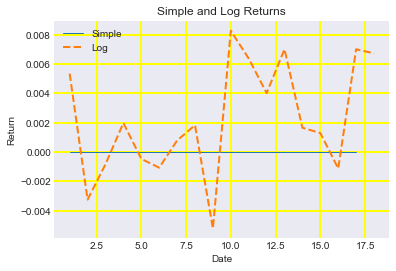

In [8]:
%matplotlib inline
dl.options.mimic_seaborn()
_, ax = plt.subplots()
cp = dl.plotting.CyclePlotter(ax)
cp.plot(sp500.index, rets, label='Simple')
cp.plot(sp500.index[1:], ch7util.log_rets(sp500), label='Log')
ax.set_title('Simple and Log Returns')
ax.set_xlabel('Date')
ax.set_ylabel('Return')
ax.legend(loc='best')

# sharpe liquidity

In [40]:

import numpy as np
import dautil as dl
import matplotlib.pyplot as plt
import ch7util
from pandas_datareader import data,DataReader

In [41]:
context = dl.nb.Context('sharpe_liquidity')
lr = dl.nb.LatexRenderer(chapter=7, start=3, context=context)
lr.render(r'S_a = \frac{E[R_a-R_b]}{\sigma_a} = \frac{E[R_a-R_b]}{\sqrt{\mathrm{var}[R_a-R_b]}}')

{'simple_log_rets.latex': [1, 2]}



<IPython.core.display.Math object>

In [42]:
def calc_metrics(ticker, ohlc):
    stock = ohlc.get(ticker)
    sp500 = ohlc.get('^GSPC')
    merged = ch7util.merge_sp500(stock, sp500)
    rets_stock = ch7util.log_rets(merged['Adj Close_stock'])
    rets_sp500 = ch7util.log_rets(merged['Adj Close_sp500'])
    stock_sp500 = rets_stock - rets_sp500
    sharpe_stock = stock_sp500.mean()/stock_sp500.std()
    avg_vol = np.log(merged['Volume_stock'].mean())

    return (sharpe_stock, avg_vol)

In [43]:
dfb = dl.report.DFBuilder(cols=['Ticker', 'Sharpe', 'Log(Average Volume)'])

ohlc = dl.data.OHLC()

for symbol in ch7util.STOCKS:
    sharpe, vol = calc_metrics(symbol, ohlc)
    dfb.row([symbol, sharpe, vol])

df = dfb.build(index=ch7util.STOCKS)

________________________________________________________________________________
[Memory] Calling dautil.data.get...
get('AAPL')


NameError: name 'DataReader' is not defined

In [39]:
from pandas_datareader import DataReader